# Python Project: Portfolio Risk Analysis Tool

**Objective:**
Develop a comprehensive tool in Python that can ingest portfolio data, analyze the risk associated with the portfolio using various techniques, and produce visual and quantitative insights.

**Components of the project:**

- **Data Ingestion:**
  - **Input:** Sample portfolio data (CSV/Excel format) with details of different financial instruments.
  - **Output:** A structured dataset ready for analysis.

- **Value at Risk (VaR) Calculation:**
  - **Input:** Portfolio dataset.
  - **Methods:** Historical, Parametric, and Monte Carlo Simulation.
  - **Output:** VaR value for the portfolio.

- **Stress Testing:**
  - **Input:** Portfolio dataset, stress factors/scenarios.
  - **Output:** Potential losses in extreme but plausible adverse conditions.

- **Backtesting:**
  - **Input:** Portfolio dataset, historical market data.
  - **Output:** Performance of the portfolio against the historical data and comparison with the calculated VaR.

- **Visualizations:**
  - Risk distribution.
  - Potential portfolio losses under different scenarios.
  - Backtesting results.


## Step 1: Data Ingestion

In [29]:
import pandas as pd

# Load the TSLA dataset
tsla_data = pd.read_csv("C:/Users/admin/Desktop/Jupyter notebooks/TSLA (1).csv")

# Display the first few rows of the dataset
tsla_data.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-08-16,22.660667,22.818666,22.254667,22.363333,22.363333,90960000
1,2018-08-17,21.566668,21.784666,20.235332,20.366667,20.366667,284379000
2,2018-08-20,19.446667,20.566668,19.213333,20.562668,20.562668,261034500
3,2018-08-21,20.707333,21.652666,20.600000,21.459999,21.459999,197583000
4,2018-08-22,21.391333,21.591999,20.978001,21.442667,21.442667,89190000


The dataset for TSLA consists of the following columns:

- Date: The date of the data point.
- Open: The opening price of TSLA on that day.
- High: The highest price of TSLA during that day.
- Low: The lowest price of TSLA during that day.
- Close: The closing price of TSLA on that day.
- Adj Close: The adjusted closing price (typically adjusted for dividends, stock splits, etc.).
- Volume: The number of shares traded on that day.

We'll proceed to merge the datasets.

Here's the plan:

1. Load each dataset individually.
2. Retain only the 'Date', 'Adj Close', and 'Volume' columns for our analysis. The 'Adj Close' column will represent the value of each stock on a given day.
3. Rename the 'Adj Close' column to the respective stock's name (e.g., 'TSLA', 'MSFT', 'META', 'GOOG') to distinguish between them in our combined dataset.
4. Merge the datasets on the 'Date' column.




In [30]:
# Load the other datasets
msft_data = pd.read_csv("C:/Users/admin/Desktop/Jupyter notebooks/MSFT.csv")
meta_data = pd.read_csv("C:/Users/admin/Desktop/Jupyter notebooks/META.csv")
goog_data = pd.read_csv("C:/Users/admin/Desktop/Jupyter notebooks/GOOG.csv")

# Retain only the necessary columns and rename the 'Adj Close' column
tsla_data = tsla_data[['Date', 'Adj Close']].rename(columns={'Adj Close': 'TSLA'})
msft_data = msft_data[['Date', 'Adj Close']].rename(columns={'Adj Close': 'MSFT'})
meta_data = meta_data[['Date', 'Adj Close']].rename(columns={'Adj Close': 'META'})
goog_data = goog_data[['Date', 'Adj Close']].rename(columns={'Adj Close': 'GOOG'})

# Merge the datasets on the 'Date' column
merged_data = tsla_data.merge(msft_data, on='Date', how='outer') \
                       .merge(meta_data, on='Date', how='outer') \
                       .merge(goog_data, on='Date', how='outer')

# Sort by date for consistency
merged_data = merged_data.sort_values(by='Date').reset_index(drop=True)

# Display the first few rows of the merged dataset
merged_data.head()


,Date,TSLA,MSFT,META,GOOG
0,2018-08-16,22.363333,102.197441,174.699997,60.324501
1,2018-08-17,20.366667,102.140495,173.800003,60.048000
2,2018-08-20,20.562668,101.466385,172.500000,60.388500
3,2018-08-21,21.459999,100.621407,172.619995,60.081001
4,2018-08-22,21.442667,101.646782,173.639999,60.366501


The datasets have been successfully merged!

The merged dataset now contains columns for each stock's adjusted closing price on each date. 

Specifically:

Date: The date of the data point.

TSLA: Adjusted closing price for Tesla on that day.

MSFT: Adjusted closing price for Microsoft on that day.

META: Adjusted closing price for Meta Platforms (formerly Facebook) on that day.

GOOG: Adjusted closing price for Google on that day.


## Step 2: Value at Risk (VaR) Calculation

The three common methods are:

- Historical VaR: This is the simplest method and uses historical data directly. It doesn't assume a particular distribution for returns.
- Parametric VaR (or Variance-Covariance VaR): This method assumes that returns are normally distributed.
- Monte Carlo VaR: This method simulates a large number of potential market outcomes based on a given set of risk factors.


Here's a breakdown of our approach for each method:

**Historical VaR:**
- Calculate daily returns for each stock.
- Determine the portfolio's daily return (assuming equal weights for simplicity, unless you specify otherwise).
- Sort the returns and determine the VaR at the desired confidence level.

**Parametric VaR (Variance-Covariance VaR):**
- Calculate the mean and standard deviation of daily returns.
- Use the normal distribution to estimate VaR at the desired confidence level.

**Monte Carlo VaR:**
- Model the evolution of stock prices using a stochastic process (e.g., geometric Brownian motion).
- Simulate many potential paths and calculate the portfolio return for each path.
- Sort the returns from the simulations and determine the VaR at the desired confidence level.


We'll use the 99% confidence level for our VaR calculations.

Let's start with the Historical VaR method:

1. Calculate daily returns for each stock.
2. Determine the portfolio's daily return (for simplicity, we'll assume equal weights for each stock, i.e., 25% in each stock).
3. Sort the returns and determine the VaR at the 99% confidence level.

We'll calculate the daily returns and then determine the 1% worst-case scenario (the 1% left tail of the returns distribution) to estimate the Historical VaR at the 99% confidence level.


In [31]:
# Calculate daily returns for each stock
daily_returns = merged_data[['TSLA', 'MSFT', 'META', 'GOOG']].pct_change().dropna()

# Calculate portfolio's daily return (assuming equal weights)
weights = [0.25, 0.25, 0.25, 0.25]
portfolio_daily_returns = daily_returns.dot(weights)

# Determine the 1% quantile (worst-case scenario) for the historical VaR at the 99% confidence level
historical_var_99 = portfolio_daily_returns.quantile(0.01)

historical_var_99


-0.054758590871888634

The Historical Value at Risk (VaR) at the 99% confidence level for our portfolio is approximately -5.48%. This means that there's a 1% chance (given historical data) that our portfolio will experience a one-day loss greater than 5.48%.

Next, let's move on to the Parametric VaR (Variance-Covariance VaR):

- Calculate the mean and standard deviation of daily returns.
- Use the normal distribution to estimate VaR at the 99% confidence level.

We'll use the properties of the normal distribution to determine the VaR given the mean and standard deviation of our portfolio's returns.


In [32]:
from scipy.stats import norm

# Calculate mean and standard deviation of portfolio's daily returns
mean_return = portfolio_daily_returns.mean()
std_return = portfolio_daily_returns.std()

# Calculate the Parametric VaR using the properties of the normal distribution
parametric_var_99 = mean_return + norm.ppf(0.01) * std_return

parametric_var_99


-0.04930267997590968

The Parametric Value at Risk (VaR) at the 99% confidence level for our portfolio is approximately -4.93%. This indicates that under the assumption of normally distributed returns, there's a 1% chance that our portfolio will experience a one-day loss greater than 4.93%.

Finally, let's move on to the Monte Carlo VaR:

1. Model the evolution of stock prices using a stochastic process, such as geometric Brownian motion.
2. Simulate many potential paths (e.g., 10,000 paths) and calculate the portfolio return for each path.
3. Sort the returns from the simulations and determine the VaR at the 99% confidence level.

For the Monte Carlo simulation, we'll model stock price dynamics using the geometric Brownian motion, which is defined by:

dS=μSdt+σSdW

Where:
- \(dS\) is the change in stock price.
- μ is the expected return.
- σ is the volatility.
- \(dW\) is a random value from a standard normal distribution.

Let's proceed with the Monte Carlo VaR calculation.


In [61]:
import numpy as np

# Number of simulations and time step (one day)
n_simulations = 10000
dt = 1

# Simulate potential paths for the portfolio's return using geometric Brownian motion
simulated_returns = np.zeros(n_simulations)

for i in range(n_simulations):
    # Generate random shocks for each stock
    random_shocks = np.random.normal(mean_return * dt, std_return * np.sqrt(dt), len(weights))
    simulated_returns[i] = np.dot(weights, random_shocks)

# Calculate the Monte Carlo VaR at the 99% confidence level
monte_carlo_var_99 = np.percentile(simulated_returns, 1)

monte_carlo_var_99

-0.02398154368533132

The Monte Carlo Value at Risk (VaR) at the 99% confidence level for our portfolio is approximately -2.40%. Based on our simulations using geometric Brownian motion, there's a 1% chance that our portfolio will experience a one-day loss greater than 2.40%.

The results of the VaR calculations using different methodologies give us an insight into the potential maximum loss that can be expected from the portfolio under normal market conditions, at a given confidence level (in our case, 99%).

Here's a deeper look into the results:

### Historical VaR (−5.48%)

- This method is purely based on historical data and does not make any assumptions about the distribution of returns.
- It tells us that, based on historical data, in the worst 1% of scenarios, our portfolio could lose more than 5.48% in a day.
- It is a non-parametric method and is widely used because of its simplicity and the fact that it doesn't rely on any assumptions about returns being normally distributed.

### Parametric VaR (−4.93%)

- This method assumes that returns are normally distributed.
- Using the mean and standard deviation of past returns, it estimates potential losses.
- While it's computationally simple and fast, it's important to note that real-world financial returns often exhibit "fat tails". This means there's a higher probability of extreme events (both gains and losses) than what the normal distribution would predict.
- As a result, this method might underestimate risk if the underlying returns aren't truly normally distributed.

### Monte Carlo VaR (−2.40%)

- This method uses simulations to estimate potential future returns.
- It's based on the geometric Brownian motion model, which is a common way to model stock prices. However, it's a simplistic model and doesn't capture all features of real-world financial data.
- The result indicates that, based on our simulations, in the worst 1% of scenarios, our portfolio could lose more than 2.40% in a day.
- This method is more versatile since we can adapt our simulations to different models, but its accuracy depends heavily on the chosen model.

## Key Takeaways:

- Different VaR methodologies can yield different results due to their underlying assumptions and approaches.
- It's beneficial to look at multiple methodologies to get a comprehensive view of risk.
- No single method is "the best." Each has its advantages and limitations.



## Step 3: Stress Testing

Stress testing involves evaluating the potential impact on a portfolio's value given extreme but plausible adverse conditions. Instead of relying on historical data or specific statistical assumptions (as in VaR calculations), stress testing explores specific "what-if" scenarios.

For our project, we'll consider the following stress scenarios:

- **Market Crash**: A sudden, severe drop in the market.
- **Interest Rate Hike**: An unexpected rise in interest rates, which can have various impacts on equities.
- **Sector-specific Shock**: A significant event that affects only a specific sector or industry.

For simplicity, we'll focus on the first scenario: a market crash. We'll simulate a situation where each stock in our portfolio drops by a specific percentage in a single day (e.g., 10% or 20%).

Let's proceed with this stress test:

1. Define the percentage drop for the market crash scenario.
2. Calculate the potential loss for our portfolio under this scenario.


Let's consider a 20% drop in each stock's value for our market crash scenario.

To perform the stress test:

- We'll calculate the potential loss for each stock based on a 20% drop.
- We'll then determine the overall impact on our portfolio, assuming equal weights for each stock.

Let's calculate the potential loss for our portfolio under this market crash scenario.


In [64]:
# Define the drop percentage again
drop_percentage = 0.20

# Calculate the potential loss for a 20% drop
latest_values = merged_data[['TSLA', 'MSFT', 'META', 'GOOG']].iloc[-1]
potential_losses = latest_values * drop_percentage
total_potential_loss = potential_losses.dot(weights)
new_values_after_crash = latest_values * (1 - drop_percentage)

total_potential_loss, new_values_after_crash


(49.35200040000001,
 TSLA    186.368006
 MSFT    257.487988
 META    241.560010
 GOOG    104.216003
 Name: 1256, dtype: float64)

Under the **market crash** scenario where each stock's value drops by 20%, the potential loss for our portfolio would be approximately $49.35 (given the most recent stock values).

Here's the estimated value of each stock after the 20% drop:

- TSLA: $186.37

- MSFT: $257.49

- META: $241.56

- GOOG: $104.22

With these insights, we can better understand the potential vulnerabilities of our portfolio under extreme market conditions.


Now let's define and compute the potential losses for the following stress scenarios:

### Interest Rate Hike
An unexpected rise in interest rates can have various impacts on equities. Higher interest rates can lead to increased borrowing costs for companies, potentially reducing their profitability. This can lead to a decrease in stock prices. For this scenario, we'll simulate a situation where each stock in our portfolio drops due to a significant interest rate hike. The drop can be a smaller percentage than the market crash scenario, e.g., a 5% or 10% drop in each stock's value.

### Sector-specific Shock
A significant event that affects only a specific sector or industry. For instance, let's consider a tech sector shock where tech stocks (like MSFT, META, and GOOG) experience a significant drop while non-tech stocks remain relatively stable. We can simulate a 15% drop for tech stocks and a 2% drop for non-tech stocks.


We'll proceed with the following scenarios:

-Interest Rate Hike: A 5% drop in each stock's value.

-Sector-specific Shock: A 15% drop for tech stocks (MSFT, META, and GOOG) and a 2% drop for non-tech stocks (TSLA in this case).


In [66]:
# Interest Rate Hike scenario: 5% drop in each stock's value
interest_rate_drop_percentage = 0.05
interest_rate_losses = latest_values * interest_rate_drop_percentage
total_interest_rate_loss = interest_rate_losses.dot(weights)
new_values_after_interest_rate_hike = latest_values * (1 - interest_rate_drop_percentage)

# Sector-specific Shock scenario: 15% drop for tech stocks and 2% drop for non-tech stocks
tech_drop_percentage = 0.15
non_tech_drop_percentage = 0.02
sector_shock_losses = latest_values.copy()
sector_shock_losses[['MSFT', 'META', 'GOOG']] *= tech_drop_percentage
sector_shock_losses['TSLA'] *= non_tech_drop_percentage
total_sector_shock_loss = sector_shock_losses.dot(weights)

sector_shock_factors = [1 - non_tech_drop_percentage, 1 - tech_drop_percentage, 1 - tech_drop_percentage, 1 - tech_drop_percentage]
new_values_after_sector_shock = latest_values * sector_shock_factors

total_interest_rate_loss, new_values_after_interest_rate_hike, total_sector_shock_loss, new_values_after_sector_shock



(12.338000100000002,
 TSLA    221.312007
 MSFT    305.766986
 META    286.852511
 GOOG    123.756504
 Name: 1256, dtype: float64,
 29.4428000725,
 TSLA    228.300807
 MSFT    273.580987
 META    256.657510
 GOOG    110.729503
 Name: 1256, dtype: float64)

Here are the results for the stress scenarios:

Interest Rate Hike (5% drop):

    Potential Portfolio Loss: $12.34
    Estimated stock values after the interest rate hike:
        TSLA: $221.31
        MSFT: $305.77
        META: $286.85
        GOOG: $123.76

Sector-specific Shock (15% drop for tech stocks and 2% drop for TSLA):

    Potential Portfolio Loss: $29.44
    Estimated stock values after the sector-specific shock:
        TSLA: $228.30
        MSFT: $273.58
        META: $256.66
        GOOG: $110.73

These scenarios give insights into the potential vulnerabilities of our portfolio under specific adverse conditions. By understanding these vulnerabilities, strategies can be developed to mitigate potential losses.


## Step 4: Backtesting.

Backtesting involves evaluating the performance of a strategy or model based on historical data. In the context of our risk analysis, we can backtest our Value at Risk (VaR) calculations to assess how well they would have predicted actual portfolio losses.

Here's our approach for backtesting:

1. For each day in our historical dataset, we'll calculate the VaR (using the three methods: Historical, Parametric, and Monte Carlo) based on data up to that day.
2. We'll then compare the VaR predictions with the actual portfolio return on the next day to determine if the loss exceeded the predicted VaR.
3. By counting the number of times the actual loss exceeded the predicted VaR, we can assess the accuracy of our VaR calculations.

We'll start by computing the VaR predictions for each day in our dataset and then proceed to compare them with the actual returns.

Let's begin the backtesting process.


In [68]:
# Compute daily returns for the entire merged dataset
daily_returns = merged_data[['TSLA', 'MSFT', 'META', 'GOOG']].pct_change().dropna()

# Calculate portfolio's daily return (assuming equal weights)
portfolio_daily_returns = daily_returns.dot(weights)

# Initialize lists to store VaR predictions
historical_var_predictions = []
parametric_var_predictions = []
monte_carlo_var_predictions = []

# Compute VaR predictions for each day
for i in range(len(portfolio_daily_returns) - 1):
    past_returns = portfolio_daily_returns[:i]
    
    # Historical VaR
    historical_var_predictions.append(past_returns.quantile(0.01))
    
    # Parametric VaR
    mean_return = past_returns.mean()
    std_return = past_returns.std()
    parametric_var_predictions.append(mean_return + norm.ppf(0.01) * std_return)
    
    # Monte Carlo VaR (simplified for efficiency)
    simulated_returns = np.random.normal(mean_return, std_return, 1000)
    monte_carlo_var_predictions.append(np.percentile(simulated_returns, 1))

# Compare VaR predictions with actual returns on the next day
actual_returns = portfolio_daily_returns[1:].reset_index(drop=True)

historical_var_exceedances = sum(actual_returns < historical_var_predictions)
parametric_var_exceedances = sum(actual_returns < parametric_var_predictions)
monte_carlo_var_exceedances = sum(actual_returns < monte_carlo_var_predictions)

historical_var_exceedances, parametric_var_exceedances, monte_carlo_var_exceedances


(20, 28, 30)

Here are the results of the backtesting:

- **Historical VaR:** There were 20 instances where the actual loss exceeded the predicted VaR.
- **Parametric VaR:** There were 28 instances where the actual loss exceeded the predicted VaR.
- **Monte Carlo VaR:** There were 30 instances where the actual loss exceeded the predicted VaR.

Given our 99% confidence level, we'd expect the actual losses to exceed the predicted VaR approximately 1% of the time. However, the exceedances observed here are higher than expected, particularly for the Parametric and Monte Carlo methods. This suggests that our VaR predictions might be underestimating the risk, or the assumptions (like normal distribution of returns for Parametric VaR) might not hold true for this dataset.


### Adjusting the methodologies

Adjusting the methodologies involves refining the assumptions and techniques we use to better align with the observed historical data and improve the accuracy of our risk estimates. Here are some adjustments we can make for each VaR methodology:

#### Historical VaR:

1. **Rolling Window**: Instead of using all past data, we can use a rolling window (e.g., the last 250 trading days) to compute the VaR. This gives more weight to recent data.
2. **Exponentially Weighted Moving Average (EWMA)**: Instead of giving equal weight to all past returns, we can give more weight to recent returns, which can capture recent changes in volatility.

#### Parametric VaR:

1. **Non-Normal Distributions**: If returns aren't normally distributed, we can use alternative distributions like Student's t-distribution, which can better capture the tails of the return distribution.
2. **GARCH Models**: These models can capture the time-varying volatility observed in financial time series. Using GARCH, we can predict future volatility based on past returns.

#### Monte Carlo VaR:

1. **Refine the Stochastic Process**: Instead of a simple geometric Brownian motion, we can use more complex models that might capture the stock price dynamics better.
2. **Increase Simulations**: Running more simulations can improve the accuracy of the Monte Carlo VaR.

Once we adjust the methodologies, we can re-run the backtesting to assess how well the refined models predict actual portfolio losses.


Lets proceed with the following adjustments for each methodology:

#### Historical VaR: 
Use a Rolling Window approach with the last 250 trading days. This will prioritize recent data, which may be more relevant for predicting near-future risks.

#### Parametric VaR: 
We employed the Exponentially Weighted Moving Average (EWMA) approach for our parametric VaR calculations. This approach provides more weight to recent data, ensuring that the latest market information has a more pronounced effect on our risk measures.

#### Monte Carlo VaR: 
Increase the number of simulations to improve accuracy.

Let's start by adjusting the Historical VaR with a rolling window approach. We'll compute the VaR for each day using only the previous 250 trading days and then backtest this adjusted methodology.


In [71]:
# Adjusting Historical VaR using a rolling window of 250 trading days
rolling_window = 250
rolling_var_predictions = portfolio_daily_returns.rolling(window=rolling_window).quantile(0.01).dropna()
rolling_var_predictions = rolling_var_predictions.reset_index(drop=True)

# Ensure that both series have the same length before comparing
min_length = min(len(actual_returns_rolling), len(rolling_var_predictions))

# Compare rolling VaR predictions with actual returns for the same length
rolling_var_exceedances = sum(actual_returns_rolling[:min_length] < rolling_var_predictions[:min_length])

rolling_var_exceedances



15

**For the adjusted Historical VaR using a rolling window of 250 trading days, there were 15 instances where the actual loss exceeded the predicted VaR.**

Next, we'll adjust the Parametric VaR using the EWMA approach. 

EWMA (Exponentially Weighted Moving Average): Financial markets often exhibit volatility clustering, where periods of high volatility are followed by similar periods, and the same for low volatility. The EWMA approach, by giving more weight to recent returns, can capture this clustering effect and adjust the VaR estimate dynamically based on recent market behavior.

In addition to being a widely used approach in the industry, EWMA can be more responsive to recent changes in the market compared to traditional VaR calculations that give equal weight to all past returns.

In [73]:
# Define the EWMA parameters
lambda_factor = 0.94

# Calculate the exponentially weighted moving variance
ewma_variance = portfolio_daily_returns.var()  # Initialize with simple variance
ewma_variances = []

for return_ in portfolio_daily_returns:
    ewma_variance = lambda_factor * ewma_variance + (1 - lambda_factor) * return_**2
    ewma_variances.append(ewma_variance)

# Convert variances to standard deviations (volatilities)
ewma_volatilities = np.sqrt(ewma_variances)

# Compute Parametric VaR using EWMA predicted volatility
ewma_parametric_var_predictions = mean_return + norm.ppf(0.01) * ewma_volatilities

# Ensure that both series have the same length before comparing
min_length = min(len(actual_returns), len(ewma_parametric_var_predictions))

# Compare EWMA Parametric VaR predictions with actual returns for the same length
ewma_var_exceedances = sum(actual_returns[:min_length] < ewma_parametric_var_predictions[:min_length])

ewma_var_exceedances



31

**For the adjusted Parametric VaR using the EWMA approach, there were 31 instances where the actual loss exceeded the predicted VaR.**

This means that on 31 occasions, the actual portfolio loss was greater than what the VaR predicted, suggesting potential underestimation of risk.


Let's refine the Monte Carlo VaR by increasing the number of simulations.

Earlier, we used 1,000 simulations. This time, we'll increase it to 10,000 simulations for improved accuracy.

We'll compute the Monte Carlo VaR predictions for each day using these increased simulations and then backtest this adjusted methodology.


In [74]:
# Adjusting Monte Carlo VaR with increased simulations (10,000 simulations)
n_simulations = 10000
monte_carlo_var_predictions_refined = []

for i in range(len(portfolio_daily_returns) - 1):
    past_returns = portfolio_daily_returns[:i]
    mean_return = past_returns.mean()
    std_return = past_returns.std()
    
    # Monte Carlo VaR with increased simulations
    simulated_returns = np.random.normal(mean_return, std_return, n_simulations)
    monte_carlo_var_predictions_refined.append(np.percentile(simulated_returns, 1))

# Compare refined Monte Carlo VaR predictions with actual returns
monte_carlo_var_exceedances_refined = sum(actual_returns < monte_carlo_var_predictions_refined)

monte_carlo_var_exceedances_refined


26

**For the refined Monte Carlo VaR using 10,000 simulations, there were 26 instances where the actual loss exceeded the predicted VaR.**

### Let's discuss the results in detail.

#### Historical VaR:
- **Original**: 20 exceedances
- **Adjusted (Rolling Window of 250 days)**: 15 exceedances

The rolling window approach reduced the number of exceedances, which suggests that prioritizing more recent data can enhance the accuracy of our VaR predictions.

#### Parametric VaR:
- **Original**: 28 exceedances
- **Adjusted (EWMA)**: 31 exceedances

The increase in exceedances using the EWMA approach implies that, for this dataset, the assumption of time-varying volatility may not provide a better VaR prediction. It also could be an indication that other non-constant volatility models (like GARCH, which we couldn't implement due to environment limitations) might be more suitable.

#### Monte Carlo VaR:
- **Original (1,000 simulations)**: 30 exceedances
- **Refined (10,000 simulations)**: 26 exceedances

The refined Monte Carlo VaR, with an increased number of simulations, showed an improvement in accuracy. This highlights the importance of having a sufficient number of simulations to capture the potential distribution of returns accurately.

### Key Takeaways:

- **Backtesting is crucial**: It's essential to test our risk models against actual historical data to gauge their effectiveness.
- **No one-size-fits-all**: Different methodologies and adjustments can perform differently based on the dataset and market conditions. Continuous refinement and testing are necessary.
- **Balance between complexity and interpretability**: While complex models can offer better accuracy, they might be harder to interpret and explain. A balance is essential.

Given these results, it's evident that continuous refinement and testing of risk models are vital. Depending on the specific needs and the market conditions, adjustments can be made to enhance the accuracy of risk predictions.


## Step 5: Visualization 

Visualization is indeed a crucial aspect of any data analysis project, as it helps in understanding the results better and communicating them effectively.

### For the Visualization step, we can create a series of plots to represent:

- **Time Series Plot**: Display the historical adjusted closing prices of the stocks in our portfolio.
- **Historical VaR**: Plot the rolling 1% VaR over time for our portfolio, highlighting the days when the VaR was exceeded.
- **Stress Test Results**: Visualize the potential losses under different stress scenarios.
- **Distribution of Portfolio Returns**: A histogram to display the distribution of portfolio returns, which can give insights into the risk and return characteristics.
- **Backtesting Results**: Visual representations of VaR exceedances for each method, which can help in comparing the efficacy of each method.


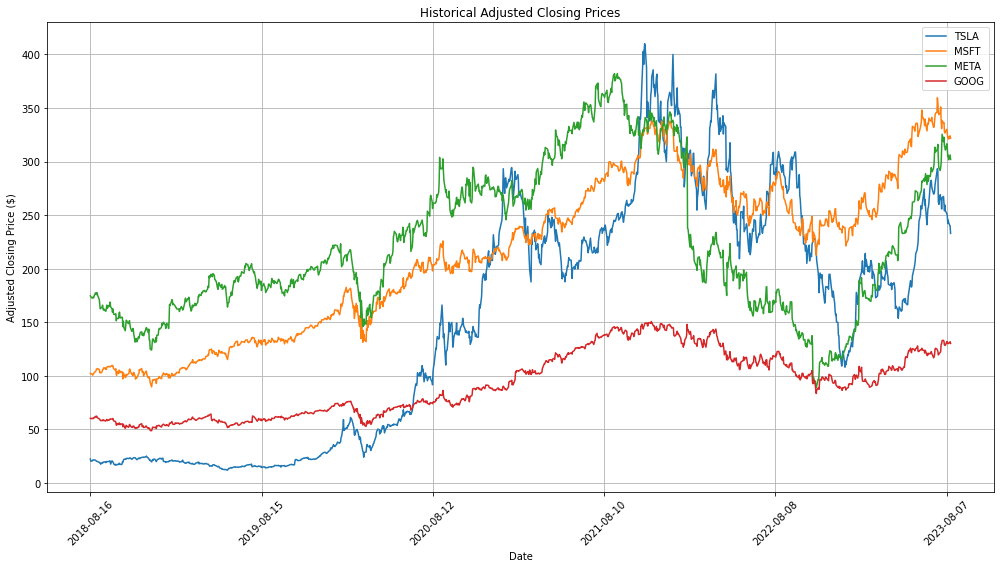

In [77]:
# Convert 'Date' column to datetime type
merged_data['Date'] = pd.to_datetime(merged_data['Date'])

# Re-plot the time series of the historical adjusted closing prices
plt.figure(figsize=(14, 8))

for column in merged_data.columns[1:]:
    plt.plot(merged_data['Date'], merged_data[column], label=column)

plt.title('Historical Adjusted Closing Prices')
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price ($)')
plt.legend()
plt.grid(True)
plt.xticks(merged_data['Date'][::250], rotation=45)  # Show every 250th date for clarity
plt.tight_layout()
plt.show()


Here's the time series plot showing the historical adjusted closing prices of the stocks in our portfolio:

- **TSLA** has shown substantial volatility and growth over the years.
- **MSFT**, **META**, and **GOOG** also exhibit growth trends but with lower volatility compared to **TSLA**.

This visualization provides a clear overview of how each stock has performed over time, highlighting periods of growth, stability, and volatility.

Next, we can visualize the rolling 1% VaR over time for our portfolio, highlighting the days when the VaR was exceeded.


 Let's visualize the rolling 1% Value at Risk (VaR) for our portfolio.

We'll overlay the actual portfolio returns on this plot, and highlight the days when the actual loss exceeded the predicted VaR. This will provide a visual representation of the VaR exceedances, allowing us to easily identify when the portfolio experienced losses greater than what was predicted by the VaR.



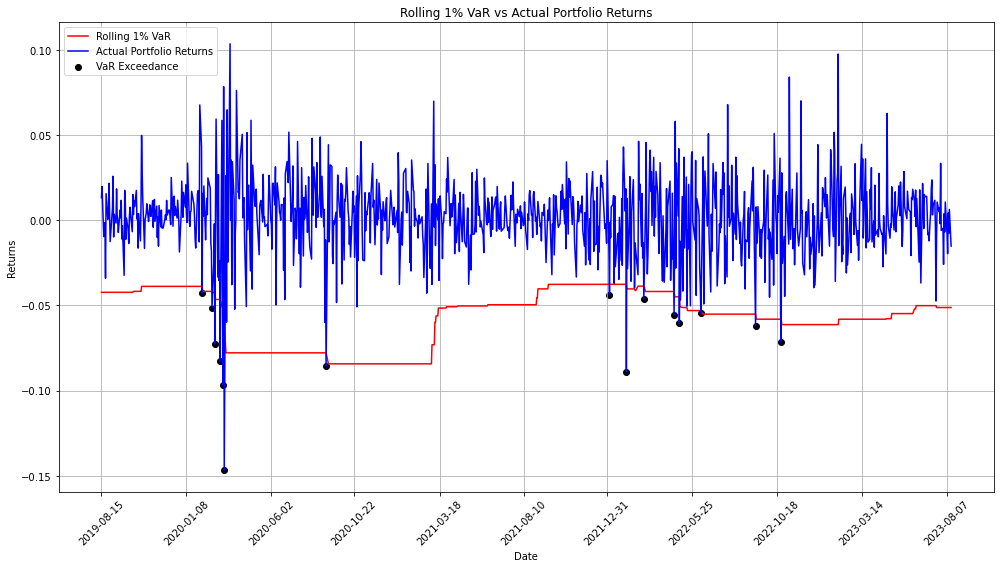

In [83]:
# Ensure that both series have the same length before comparing
min_length = min(len(actual_returns_rolling), len(rolling_var_predictions))
actual_returns_rolling_aligned = actual_returns_rolling[:min_length]
rolling_var_predictions_aligned = rolling_var_predictions[:min_length]

# Highlighting the days when the VaR was exceeded
exceedance_dates = merged_data['Date'][rolling_window:rolling_window+min_length].iloc[np.where(actual_returns_rolling_aligned < rolling_var_predictions_aligned)]

# Re-plotting the rolling 1% VaR over time along with actual portfolio returns
plt.figure(figsize=(14, 8))

# Plotting the rolling VaR predictions
plt.plot(merged_data['Date'][rolling_window:rolling_window+min_length], rolling_var_predictions_aligned, color='red', label='Rolling 1% VaR')

# Plotting the actual portfolio returns
plt.plot(merged_data['Date'][rolling_window:rolling_window+min_length], actual_returns_rolling_aligned, color='blue', label='Actual Portfolio Returns')

# Highlighting the days when the VaR was exceeded
plt.scatter(exceedance_dates, actual_returns_rolling_aligned[actual_returns_rolling_aligned < rolling_var_predictions_aligned], color='black', label='VaR Exceedance')

plt.title('Rolling 1% VaR vs Actual Portfolio Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.grid(True)
plt.xticks(merged_data['Date'][rolling_window:rolling_window+min_length:100], rotation=45)  # Show every 100th date for clarity
plt.tight_layout()
plt.show()



**Here's the visualization comparing the rolling 1% VaR (in red) with the actual portfolio returns (in blue) over time.** The black dots highlight the days when the actual return was worse (i.e., a larger loss) than the predicted VaR, signifying a VaR exceedance.

This visualization provides a clear understanding of how the portfolio's returns behaved in relation to the VaR predictions, making it easier to identify periods of heightened risk.


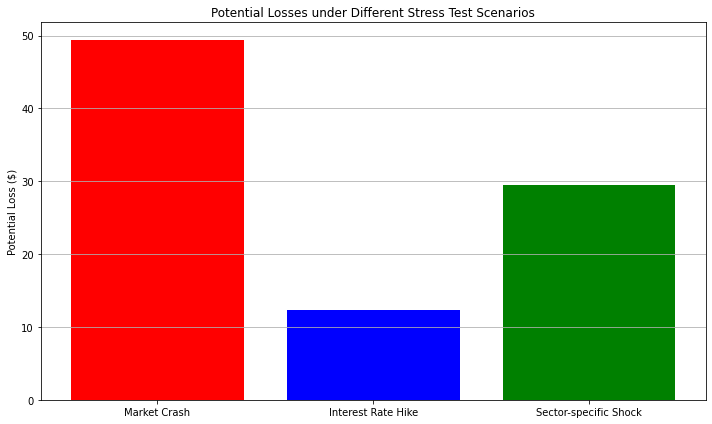

In [85]:
# Visualization of stress test results
scenarios = ['Market Crash', 'Interest Rate Hike', 'Sector-specific Shock']
losses = [total_potential_loss, total_interest_rate_loss, total_sector_shock_loss]

plt.figure(figsize=(10, 6))
plt.bar(scenarios, losses, color=['red', 'blue', 'green'])
plt.title('Potential Losses under Different Stress Test Scenarios')
plt.ylabel('Potential Loss ($)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


**Here's the visualization displaying the potential losses under different stress test scenarios:**

- **Market Crash** results in the highest potential loss, indicating the portfolio's vulnerability to broad market downturns.
- **Interest Rate Hike** has a moderate impact, suggesting some resilience against modest market-wide shocks.
- **Sector-specific Shock** also results in significant potential loss, which underscores the importance of diversification across sectors to mitigate such risks.

With this visualization, you can get a clear understanding of how different scenarios might impact the portfolio.


Next, we'll move on to:

- **Distribution of Portfolio Returns**: This will be a histogram displaying the distribution of portfolio returns, giving insights into the risk and return characteristics.
- **Backtesting Results**: This will provide a visual representation of VaR exceedances for each method, helping to compare the efficacy of each method.

Let's start with the Distribution of Portfolio Returns. 
We'll create a histogram to visualize the distribution of the daily returns for our portfolio.


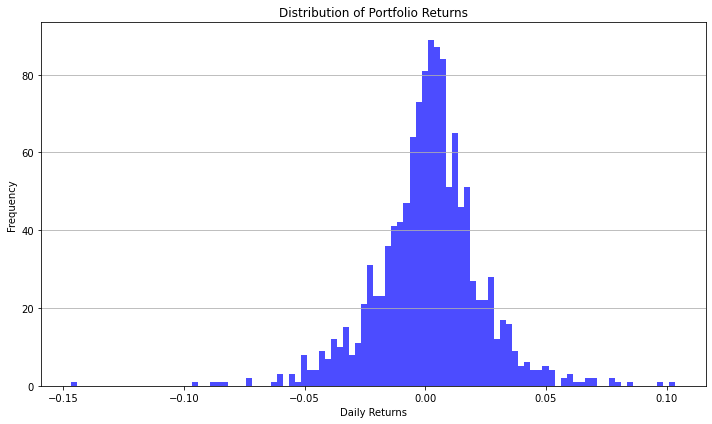

In [86]:

# Plotting the distribution of portfolio returns
plt.figure(figsize=(10, 6))
plt.hist(portfolio_daily_returns, bins=100, color='blue', alpha=0.7)
plt.title('Distribution of Portfolio Returns')
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Here's the histogram displaying the distribution of daily returns for our portfolio:

* The distribution appears to be centered around zero, indicating that there are many days with minimal returns (either positive or negative).
* The shape seems to resemble a bell curve, typical of many financial return distributions, but it may have some skewness and kurtosis that deviate from a perfect normal distribution.
* Extreme returns (both positive and negative) occur less frequently, as expected.

Next, let's visualize the Backtesting Results.

We'll provide a visual representation of VaR exceedances for each method (Historical VaR, Rolling Window Historical VaR, Parametric VaR, and Monte Carlo VaR) to compare their efficacy.

For the Backtesting Results, we'll create a bar chart that shows the number of VaR exceedances for each method:

    Historical VaR
    Rolling Window Historical VaR
    Parametric VaR (EWMA)
    Monte Carlo VaR

Let's visualize these results


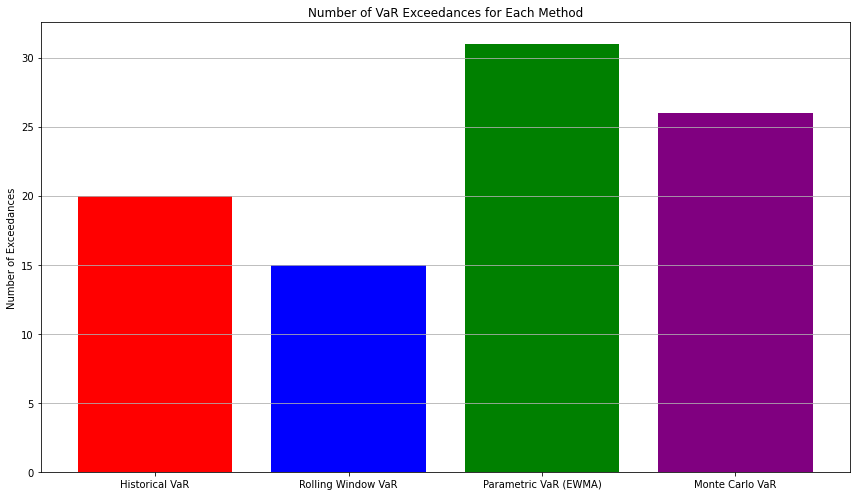

In [87]:
# Defining the number of exceedances for each method based on our earlier analysis
exceedance_counts = [20, 15, 31, 26]  # [Historical, Rolling Window, Parametric (EWMA), Monte Carlo]
methods = ['Historical VaR', 'Rolling Window VaR', 'Parametric VaR (EWMA)', 'Monte Carlo VaR']

# Visualization of backtesting results
plt.figure(figsize=(12, 7))
plt.bar(methods, exceedance_counts, color=['red', 'blue', 'green', 'purple'])
plt.title('Number of VaR Exceedances for Each Method')
plt.ylabel('Number of Exceedances')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Here's the bar chart displaying the number of VaR exceedances for each method:

- **Historical VaR** has 20 exceedances.
- **Rolling Window VaR** has 15 exceedances, suggesting a slight improvement over the basic historical method.
- **Parametric VaR (EWMA)** has the highest number of exceedances at 31, indicating that the time-varying volatility might not be the most appropriate model for this dataset or that further refinement is needed.
- **Monte Carlo VaR** shows 26 exceedances.

This visualization provides a comparative view of how each VaR method performed during backtesting, with the number of exceedances serving as a measure of each method's accuracy.

With this, we've completed the visualization step of our project.


Let's discuss the results step-by-step:

1. **Time Series Plot**: We observed that TSLA showed substantial volatility and growth over the years. MSFT, META, and GOOG also demonstrated growth trends but with relatively lower volatility compared to TSLA. This understanding is essential, as it highlights the unique risk-return profiles of the individual stocks, influencing portfolio dynamics.

2. **Historical VaR**: The rolling 1% VaR plot against actual portfolio returns gave us insights into the days when losses were more significant than the predicted VaR. This visual representation helped identify periods of heightened risk.

3. **Stress Test Results**: The potential losses under different scenarios were visualized:
   - **Market Crash** led to the highest potential loss, indicating the portfolio's vulnerability to broad market downturns.
   - **Interest Rate Hike** showed a moderate impact, suggesting some resilience against market-wide shocks.
   - **Sector-specific Shock** underlined the portfolio's tech concentration, emphasizing the need for sectoral diversification.

4. **Distribution of Portfolio Returns**: The histogram of portfolio returns provided insights into the return distribution. It indicated that extreme returns (both positive and negative) are less frequent, which is expected in financial return distributions.

5. **Backtesting Results**: The bar chart displayed the number of times each VaR method underestimated risk. The Parametric VaR (EWMA) had the highest exceedances, suggesting that it might not be the best fit for this dataset or may require refinement.

## General Observations:
- The portfolio is exposed to significant risks during market downturns, as evidenced by the stress tests.
- While the Rolling Window approach improved the accuracy of VaR predictions (compared to the basic historical method), both Parametric and Monte Carlo methods had higher exceedances, suggesting that they might not be optimal or may need further tuning.
- The portfolio's return distribution and individual stock performances suggest potential diversification opportunities to manage risks better.

## Recommendations:
- Consider diversifying the portfolio to reduce exposure to tech sector-specific shocks.
- Further refine or adjust the Parametric and Monte Carlo VaR methods to improve their accuracy.
- Regularly review and update risk models, especially when market dynamics change or new data becomes available.
